### IMPORT

In [12]:
from netCDF4 import Dataset as ncfile
import numpy as np
import matplotlib.pyplot as plt
import cartopy

### READ DATA

In [7]:
ppidir = '/lustre/storeB/users/justinec/master_internship/data/ERA5_MOSAiC/'
data_link  = ppidir + 'concatenated_ERA5_MOSAiC.nc'

dataset = ncfile(data_link,'r')    #dataset of radiosoundings of MOSAiC and ERA5

In [8]:
pres = dataset.variables['pres'][:]
mosaic_time = dataset.variables['time_mosaic'][:]
mosaic_lat = dataset.variables['lat_mosaic'][:]
mosaic_lon = dataset.variables['lon_mosaic'][:]

In [15]:
mosaic_lat[0][0]

85.04956338183227

In [22]:
a = np.linspace(0,1,366*4)

In [26]:
len(mosaic_lat)

1399

In [36]:
def hex_to_RGB(hex_str):
    """ #FFFFFF -> [255,255,255]"""
    #Pass 16 to the integer function for change of base
    return [int(hex_str[i:i+2], 16) for i in range(1,6,2)]
def get_color_gradient(c1, c2, n):
    """
    Given two hex colors, returns a color gradient
    with n colors.
    """
    assert n > 1
    c1_rgb = np.array(hex_to_RGB(c1))/255
    c2_rgb = np.array(hex_to_RGB(c2))/255
    mix_pcts = [x/(n-1) for x in range(n)]
    rgb_colors = [((1-mix)*c1_rgb + (mix*c2_rgb)) for mix in mix_pcts]
    return ["#" + "".join([format(int(round(val*255)), "02x") for val in item]) for item in rgb_colors]

In [63]:
from colour import Color
blue = Color("blue")
colors = list(blue.range_to(Color("red"),366*4))
len(colors)

1464

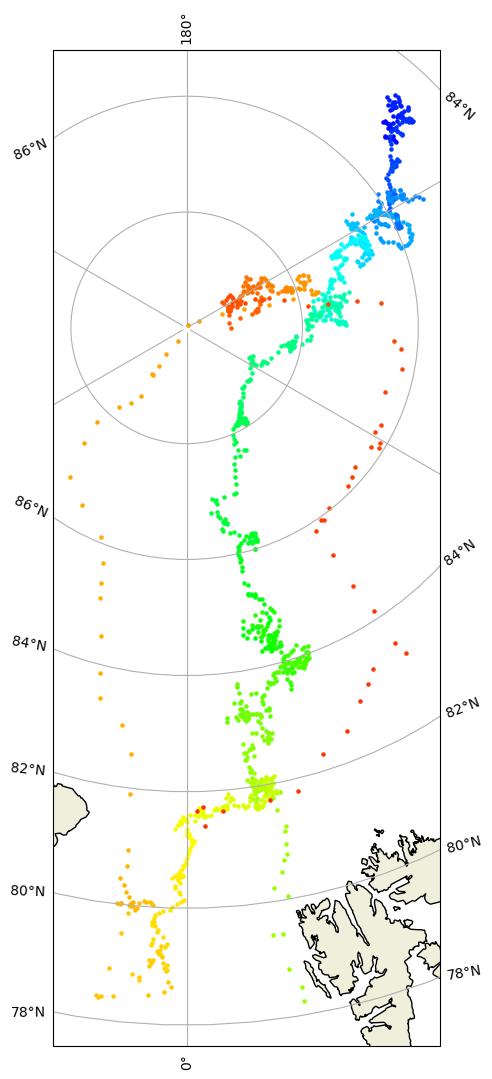

In [64]:
import matplotlib as mpl
plt.figure(figsize=(5,13)) #10x20 stereo , #20x20 lambert
ax = plt.axes(projection=cartopy.crs.Stereographic(central_latitude = 90, central_longitude = 0))

ax.gridlines(draw_labels=True, x_inline=False, y_inline=False)
ax.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='black')
#ax.set_extent([mosaic_lon.min(), mosaic_lon.max(), mosaic_lat.min(), mosaic_lat.max()], crs=cartopy.crs.PlateCarree())

for i in range(0, len(mosaic_lat)) :
    plt.scatter(mosaic_lon[i][0], mosaic_lat[i][0], marker='o', s=5, color=str(colors[i]), transform=cartopy.crs.PlateCarree())
       
path_fig = '/lustre/storeB/users/justinec/master_internship/figures/'
#plt.savefig(path_fig+'MOSAiC_trajectory.png',dpi=300)